<a href="https://colab.research.google.com/github/Dailehit/models/blob/main/%D0%B4%D0%B7_%D1%81%D1%82%D0%B0%D1%82%D1%8B_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

predicting electricity consumption using the prophet algorithm

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm
import warnings


warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_parquet('/content/est_hourly.paruqet')
df

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN
2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN
2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN


In [ ]:
df_r = pd.read_csv('/content/AEP_hourly.csv')
df_r

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [ ]:
missing_values = df_r.isnull().sum

missing_values

df_r.dropna(inplace = True)
df_r.drop_duplicates(inplace = True)

<Axes: title={'center': 'Distribution de PJM_Load'}, ylabel='Frequency'>

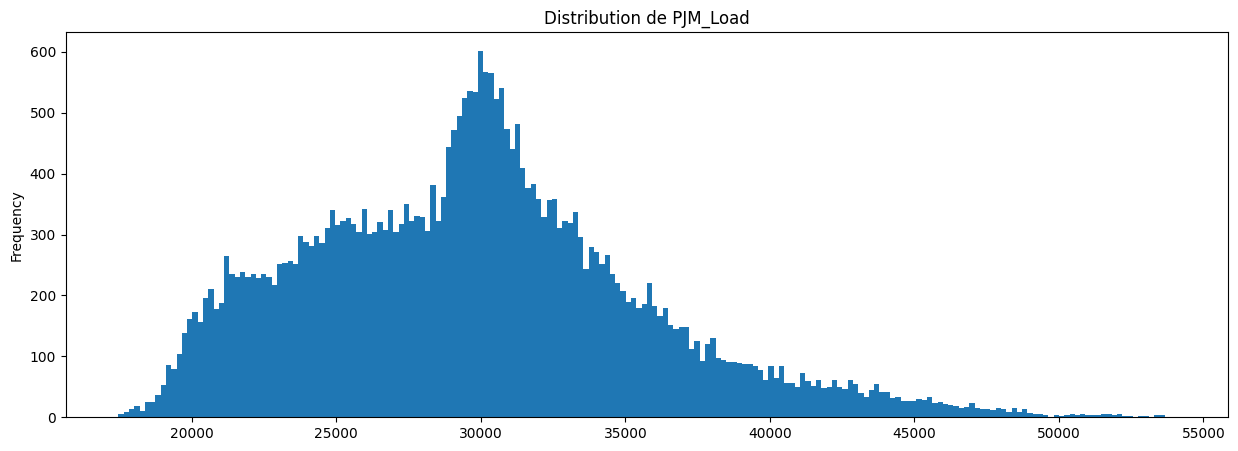

In [ ]:
df['PJM_Load'].plot.hist(figsize=(15, 5), bins=200, title='Distribution de PJM_Load')

In [ ]:
df.describe()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
count,121273.000000,66497.000000,121275.000000,57739.000000,116189.000000,119068.000000,45334.000000,62874.000000,58450.000000,145366.000000,143206.000000,32896.000000
mean,15499.513717,11420.152112,2037.851140,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,32080.222831,5602.375089,29766.427408
std,2591.399065,2304.139517,393.403153,599.859026,2413.946569,301.740640,378.868404,1331.268006,2371.498701,6464.012166,979.142872,5849.769954
min,9581.000000,7237.000000,982.000000,907.000000,1253.000000,1014.000000,514.000000,0.000000,7003.000000,14544.000000,487.000000,17461.000000
25%,13630.000000,9780.000000,1749.000000,2687.000000,9322.000000,1444.000000,1185.000000,6807.000000,9954.000000,27573.000000,4907.000000,25473.000000
50%,15310.000000,11152.000000,2009.000000,3013.000000,10501.000000,1630.000000,1386.000000,7700.000000,11521.000000,31421.000000,5530.000000,29655.000000
75%,17200.000000,12510.000000,2279.000000,3449.000000,12378.000000,1819.000000,1699.000000,8556.000000,12896.750000,35650.000000,6252.000000,33073.250000
max,25695.000000,23753.000000,3746.000000,5445.000000,21651.000000,3054.000000,3490.000000,14032.000000,23631.000000,62009.000000,9594.000000,54030.000000


array([[<Axes: title={'center': 'AEP'}>,
        <Axes: title={'center': 'COMED'}>,
        <Axes: title={'center': 'DAYTON'}>],
       [<Axes: title={'center': 'DEOK'}>,
        <Axes: title={'center': 'DOM'}>, <Axes: title={'center': 'DUQ'}>],
       [<Axes: title={'center': 'EKPC'}>, <Axes: title={'center': 'FE'}>,
        <Axes: title={'center': 'NI'}>],
       [<Axes: title={'center': 'PJME'}>,
        <Axes: title={'center': 'PJMW'}>,
        <Axes: title={'center': 'PJM_Load'}>]], dtype=object)

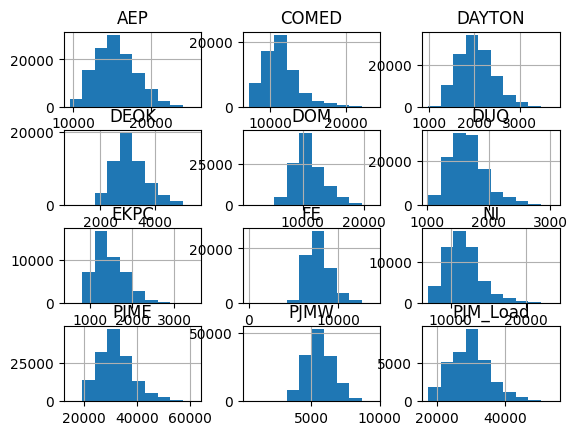

In [ ]:
df.hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178262 entries, 1998-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AEP       121273 non-null  float64
 1   COMED     66497 non-null   float64
 2   DAYTON    121275 non-null  float64
 3   DEOK      57739 non-null   float64
 4   DOM       116189 non-null  float64
 5   DUQ       119068 non-null  float64
 6   EKPC      45334 non-null   float64
 7   FE        62874 non-null   float64
 8   NI        58450 non-null   float64
 9   PJME      145366 non-null  float64
 10  PJMW      143206 non-null  float64
 11  PJM_Load  32896 non-null   float64
dtypes: float64(12)
memory usage: 17.7 MB


<Axes: title={'center': 'Распределение потребления по регионам'}, ylabel='Frequency'>

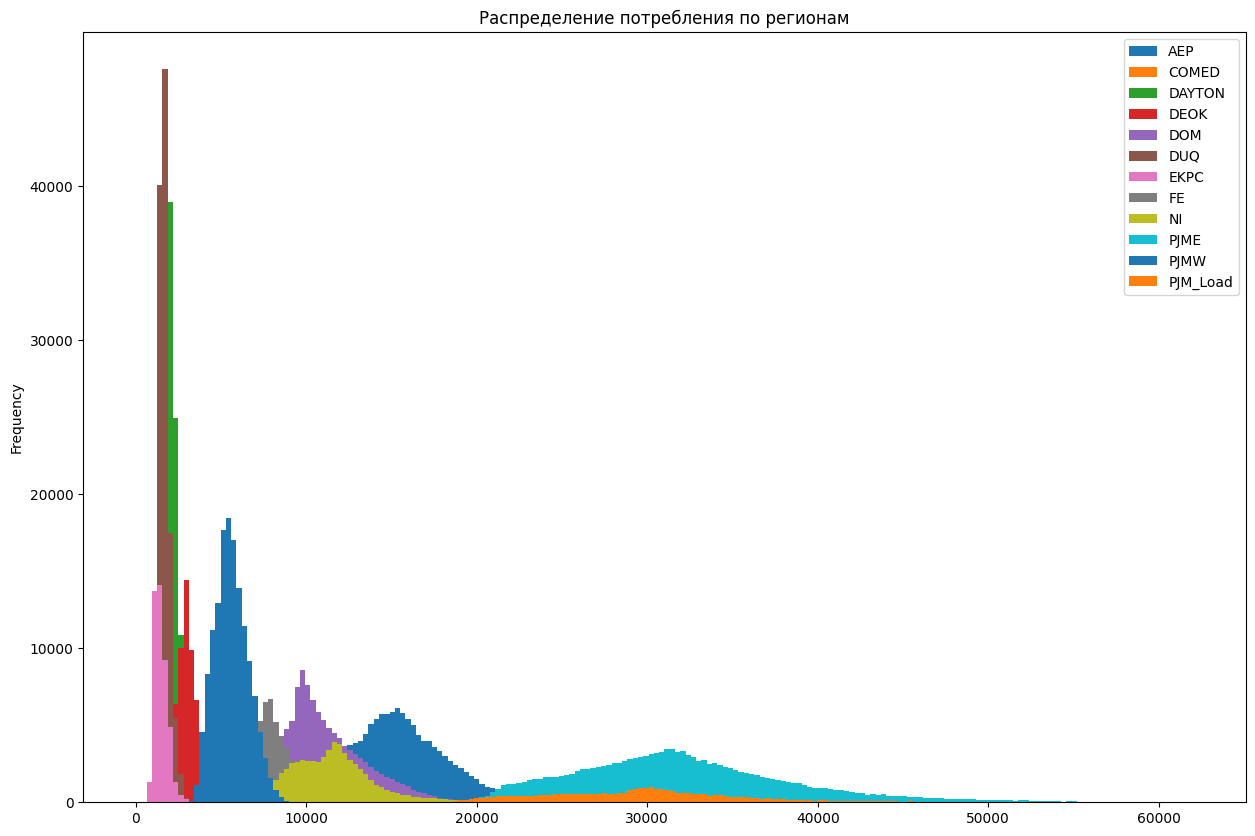

In [ ]:
df.plot.hist(figsize=(15, 10), bins=200, title='Распределение потребления по регионам')

<Axes: title={'center': 'Потребление регионов 1998-2018'}, xlabel='Datetime'>

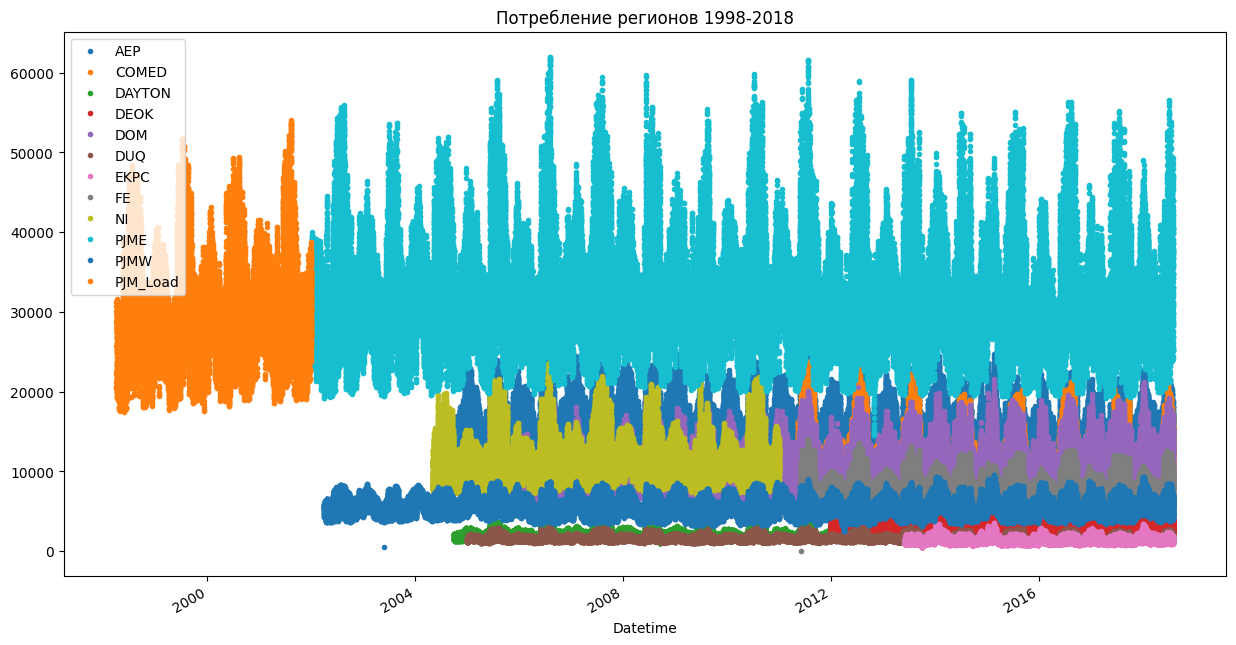

In [ ]:
df.plot(style='.', figsize=(15, 8), title='Потребление регионов 1998-2018')

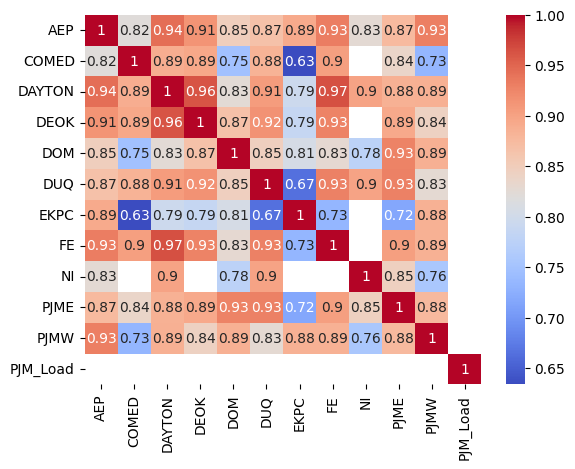

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
pjme = pd.read_csv('/content/PJME_hourly.csv',index_col=[0],parse_dates=[0])
pjme

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


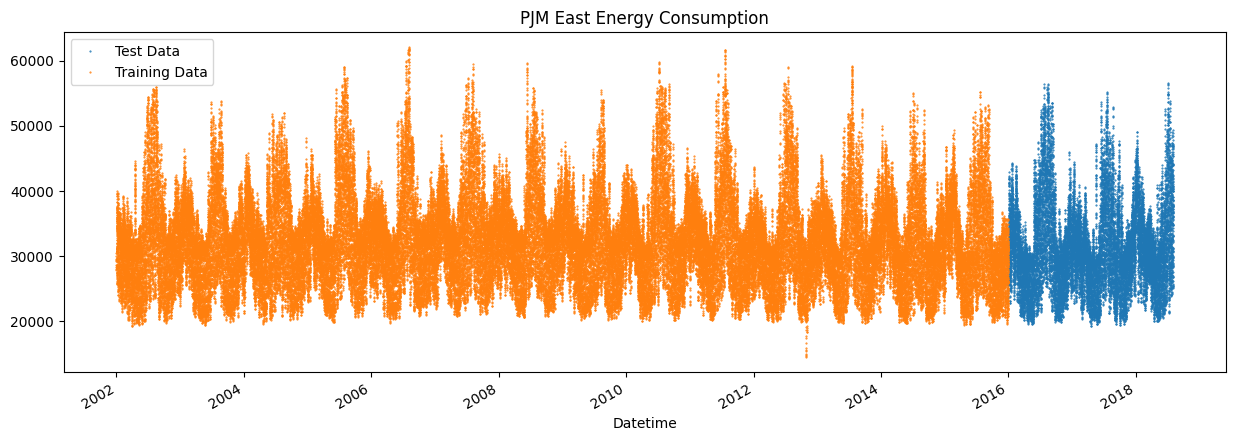

In [ ]:
# Установка даты для разделения данных на обучающую и тестовую выборки
date_for_splitting = '2016-01-01'

# Создание обучающего набора данных до указанной даты
training_data = pjme[pjme.index <= date_for_splitting].copy()

# Создание тестового набора данных после указанной даты
testing_data = pjme[pjme.index > date_for_splitting].copy()

# Объединение и визуализация обучающего и тестового наборов данных
combined_data = testing_data.rename(columns={'PJME_MW': 'Test Data'}) \
    .join(training_data.rename(columns={'PJME_MW': 'Training Data'}), how='outer')
combined_data.plot(figsize=(15, 5), title='PJM East Energy Consumption', style='.', ms=1)

# Отображение графика
plt.show()


In [ ]:
pjme_train_prophet = (training_data.reset_index()).rename(columns={'Datetime':'ds','PJME_MW':'y'})

In [ ]:
model = Prophet(interval_width=0.95)
model.fit(pjme_train_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpkf4edcce/3sauo7l8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkf4edcce/9nfpo389.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85665', 'data', 'file=/tmp/tmpkf4edcce/3sauo7l8.json', 'init=/tmp/tmpkf4edcce/9nfpo389.json', 'output', 'file=/tmp/tmpkf4edcce/prophet_modelrpubhqlt/prophet_model-20240109122520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:25:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
pjme_test_prophet = (testing_data.reset_index()).rename(columns={'Datetime':'ds','PJME_MW':'y'})
pjme_test_fcst = model.predict(pjme_test_prophet)

In [ ]:
pjme_test_prophet

,ds,y
0,2016-12-31 01:00:00,29627.0
1,2016-12-31 02:00:00,28744.0
2,2016-12-31 03:00:00,28274.0
3,2016-12-31 04:00:00,28162.0
4,2016-12-31 05:00:00,28434.0
...,...,...
22674,2018-01-01 20:00:00,44284.0
22675,2018-01-01 21:00:00,43751.0
22676,2018-01-01 22:00:00,42402.0
22677,2018-01-01 23:00:00,40164.0


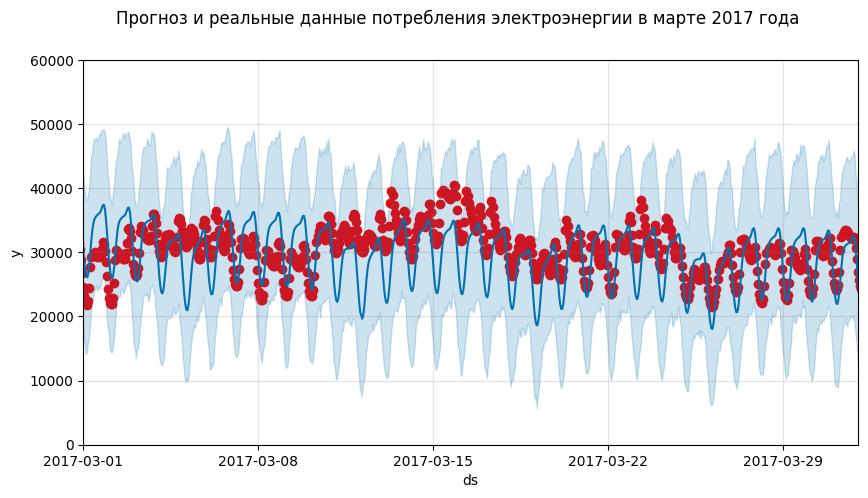

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Установка начальной и конечной даты интересующего периода
period_start = pd.to_datetime('2017-03-01')
period_end = pd.to_datetime('2017-04-01')

# Создание фигуры и осей для графика
fig, ax = plt.subplots(figsize=(10, 5))

# Отображение тестовых данных
ax.scatter(testing_data.index, testing_data['PJME_MW'], color='red')

# доверительный интервал изменил с 0.8 до 0.95
interval_width=0.95

# Добавление прогноза модели на те же оси
model.plot(pjme_test_fcst, ax=ax)

# Установка границ осей
ax.set_xlim(left=period_start, right=period_end)
ax.set_ylim(bottom=0, top=60000)

# Установка заголовка графика
plt.suptitle('Прогноз и реальные данные потребления электроэнергии в марте 2017 года')
plt.show()


In [ ]:
#использую метрики мае и мапе

y_true_numerical = pjme_test_prophet['y'].values
y_pred_numerical = pjme_test_fcst['yhat'].values

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_squared_error(y_true, y_pred):
    """Calculates MSE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) ** 2)

def quantile_loss(q, y_true, y_pred):
    e = y_true - y_pred
    return np.maximum(q * e, (q - 1) * e).mean()



q = 0.5  # Задание квантиля для функции квантильной ошибки
print('MAPE:', mean_absolute_percentage_error(y_true=y_true_numerical, y_pred=y_pred_numerical), '%')
print('MSE:', mean_squared_error(y_true=y_true_numerical, y_pred=y_pred_numerical))
print('Quantile Loss:', quantile_loss(q, y_true=y_true_numerical, y_pred=y_pred_numerical))

MAPE: 15.842223931354226 %
MSE: 39770423.70838724
Quantile Loss: 2459.487327976678


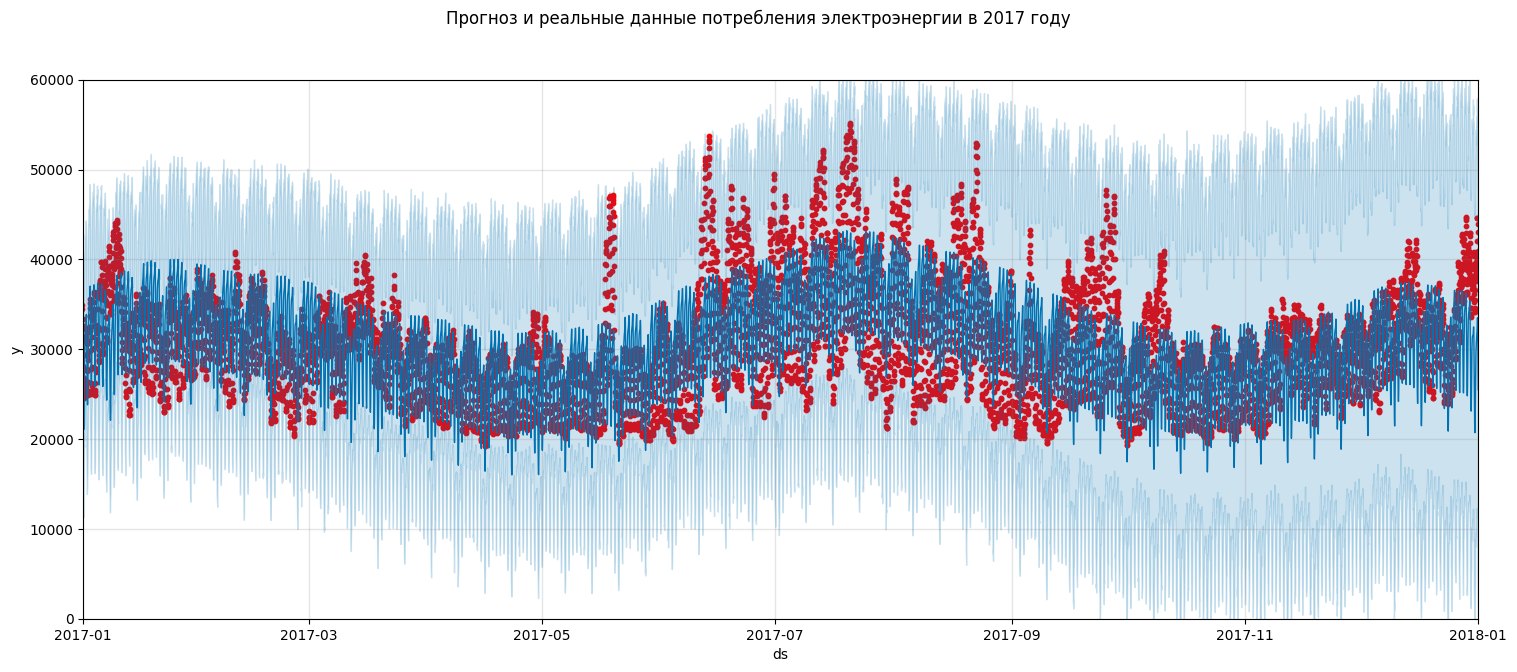

In [ ]:
# Установка начальной и конечной даты интересующего периода
period_start = pd.to_datetime('2017-01-01')
period_end = pd.to_datetime('2018-01-01')

# Создание фигуры и осей для графика
fig, ax = plt.subplots(figsize=(18, 7))

# Отображение тестовых данных
ax.scatter(testing_data.index, testing_data['PJME_MW'], color='red', s=10)  # Уменьшен размер точек

# Добавление прогноза модели на те же оси
model.plot(pjme_test_fcst, ax=ax)

# доверительный интервал изменил с 0.8 до 0.95
interval_width=0.95

# Изменение толщины линии после создания графика
for line in ax.get_lines():
    line.set_linewidth(1)

# Установка границ осей
ax.set_xlim(left=period_start, right=period_end)
ax.set_ylim(bottom=0, top=60000)

# Установка заголовка графика
plt.suptitle('Прогноз и реальные данные потребления электроэнергии в 2017 году')
plt.show()


In [ ]:
y_true = pjme_test_prophet['y'].values
y_lower = pjme_test_fcst['yhat_lower'].values
y_upper = pjme_test_fcst['yhat_upper'].values

inside_interval = ((y_true >= y_lower) & (y_true <= y_upper)).mean()

print(f"Coverage: {inside_interval * 100:.2f}%")


Coverage: 88.98%
